## Iodine Florecense Spectroscopy

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

read data collected tron NI labview

In [2]:
df = pd.read_csv('avg iodine run2.csv')
df1 = pd.read_csv('avg iodine run3.csv')
df2 = pd.read_csv('avg iodine run4 driven.csv')

In [3]:
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Average
0,88951,0.113835,0.115846,0.115846,0.120872,0.115176,0.117521,0.115846,0.115846,0.116516,0.117856,0.116516
1,88952,0.120202,0.114171,0.116851,0.112495,0.118191,0.116181,0.120202,0.116516,0.112160,0.116851,0.116382
2,88953,0.114841,0.115846,0.119867,0.110820,0.119531,0.115511,0.120537,0.116181,0.118191,0.116851,0.116818
3,88954,0.116181,0.105793,0.117186,0.111825,0.117186,0.116181,0.119867,0.115846,0.115846,0.113835,0.114975
4,88955,0.115176,0.116516,0.115846,0.118526,0.117186,0.114841,0.115511,0.115846,0.117856,0.117856,0.116516


(91000.0, 96000.0)

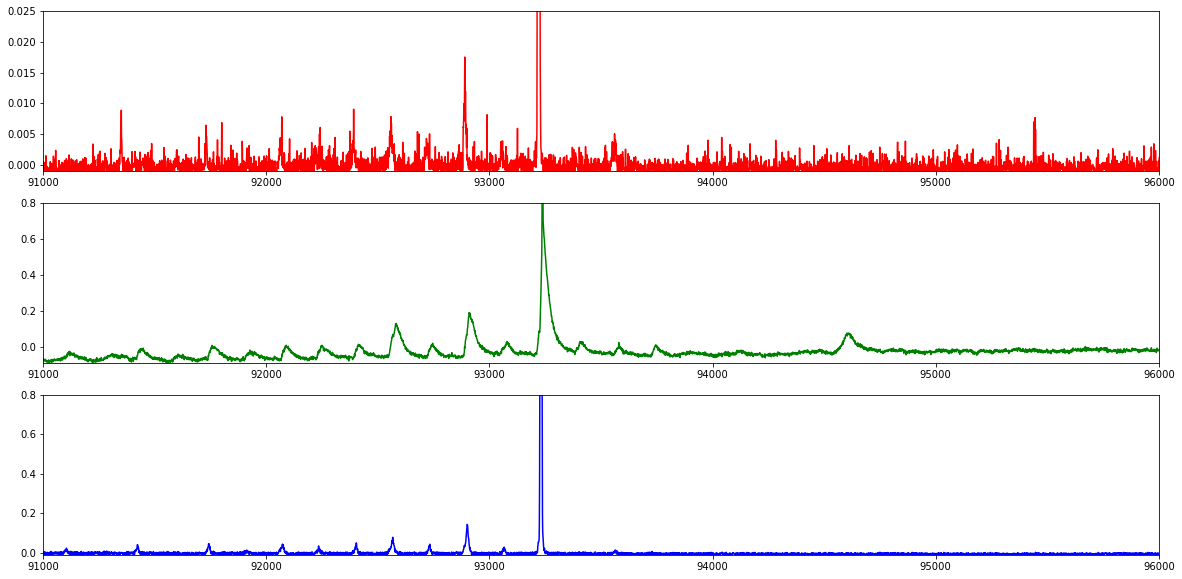

In [58]:
# plot wavenumber by voltage
plt.figure(figsize=(20,10))
plt.title("Iodine Florecence Peaks")
plt.subplot(311)
plt.plot(df.Column1,-df.Average-(-df.Average).mean(), color='r')
y = -df2.Average-(-df2.Average).mean()
plt.ylim(-0.001,0.025) # largest magnitude, lowest magnitude
plt.xlim(91000,96000)

plt.subplot(312)
plt.plot(df1.Column1,df1.Average -df1.Average.mean(), color='g')
y = df1.Average-df1.Average.mean()
plt.ylim(y.min(),0.8) # largest magnitude, lowest magnitude
plt.xlim(91000,96000)

plt.subplot(313)
plt.plot(df2.Column1,-df2.Average-(-df2.Average).mean(), color='b')

y = -df1.Average-(-df1.Average).mean()
plt.ylim(-0.01,0.8) # largest magnitude, lowest magnitude
plt.xlim(91000,96000)

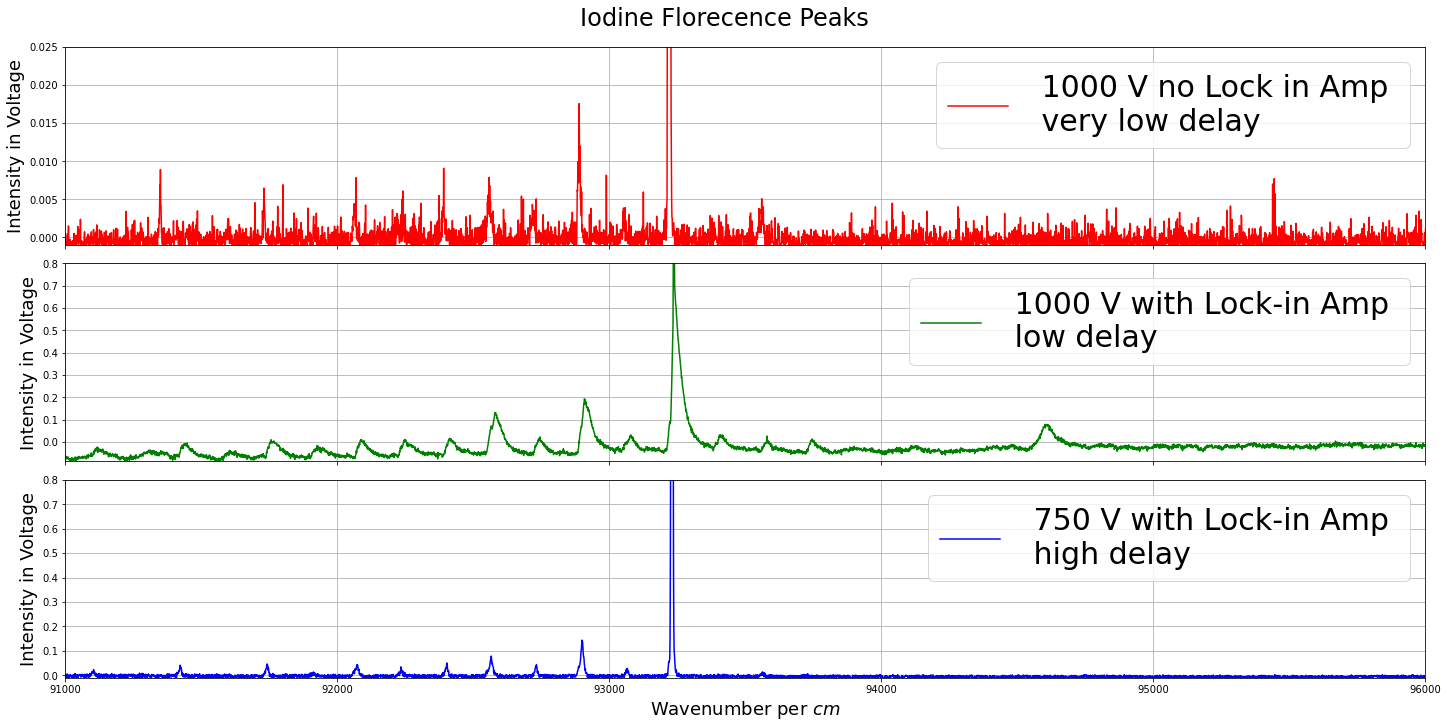

In [5]:
# plot wavenumber by voltage
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(20,10),  constrained_layout=True)

fig.suptitle("Iodine Florecence Peaks", fontsize=24)


axs[0].plot(df.Column1,-df.Average-(-df.Average).mean(), color='r', label=" 1000 V no Lock in Amp \n very low delay")
axs[0].set_ylim(-0.001,0.025) # largest magnitude, lowest magnitude
axs[0].set_xlim(91000,96000)
axs[0].grid(True)
axs[0].set_ylabel("Intensity in Voltage",fontsize=18)
axs[0].legend(prop={'size': 30})

axs[1].plot(df1.Column1,df1.Average -df1.Average.mean(), color='g', label=" 1000 V with Lock-in Amp \n low delay")
y = df1.Average-df1.Average.mean()
axs[1].set_ylim(y.min(),0.8) # largest magnitude, lowest magnitude
axs[1].set_xlim(91000,96000)
axs[1].grid(True)
axs[1].set_ylabel("Intensity in Voltage",fontsize=18)
axs[1].legend(prop={'size': 30})


axs[2].plot(df2.Column1,-df2.Average-(-df2.Average).mean(), color='b', label=" 750 V with Lock-in Amp \n high delay")
axs[2].set_ylim(-0.01,0.8) # largest magnitude, lowest magnitude
axs[2].set_xlim(91000,96000)
axs[2].set_ylabel("Intensity in Voltage",fontsize=18)
axs[2].legend(prop={'size': 30})
axs[2].set_xlabel("Wavenumber per $cm$",fontsize=18)


axs[2].grid(True)

In [6]:
def make_into_measured(df,m,b):
    return df.Column1*m +b

In [7]:
def make_into_wavelength(df,m,b):
    return make_into_measured(df,m,b)**-1 *1e7

(-0.01, 0.8)

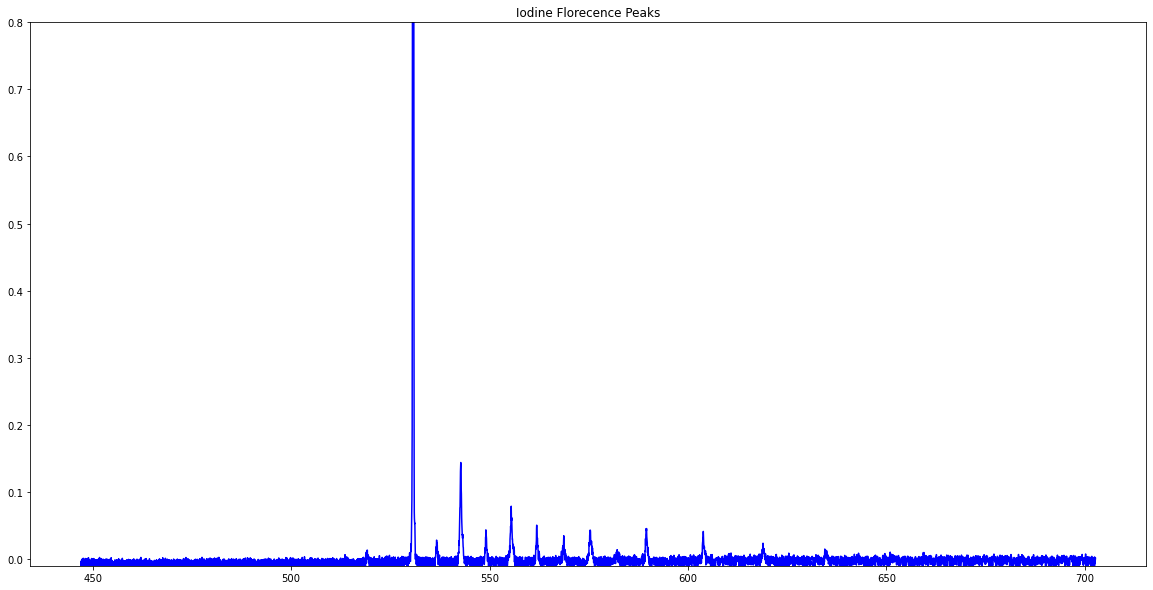

In [8]:
plt.figure(figsize=(20,10))
plt.title("Iodine Florecence Peaks")
plt.plot(make_into_wavelength(df2,1.2622,-98835),-df2.Average-(-df2.Average).mean(), color='b')
plt.ylim(-0.01,0.8)

In [9]:
x =-df2.Average-(-df2.Average).mean()
y =make_into_wavelength(df2,1.2622,-98835)

In [10]:
peaks, f = find_peaks(x, height=0.009)
peaks, f

(array([ 739,  742,  896, 1202, 1208, 1212, 1519, 1521, 1523, 1526, 1530,
        1695, 1833, 1835, 1839, 1841, 1845, 1847, 2156, 2163, 2165, 2169,
        2172, 2325, 2330, 2334, 2336, 2338, 2479, 2481, 2483, 2487, 2489,
        2494, 2496, 2500, 2502, 2504, 2649, 2656, 2660, 2663, 2670, 2810,
        2812, 2818, 2821, 2825, 2831, 2970, 2975, 2977, 2980, 2985, 2988,
        2992, 2998, 3002, 3146, 3152, 3154, 3158, 3160, 3309, 3311, 3322,
        3334, 3336, 3338, 3479, 3481, 3483, 3485, 3488, 3492, 3640, 3653,
        3668, 3677, 3984, 3986, 3989, 3992]),
 {'peak_heights': array([0.00978196, 0.00968196, 0.01035166, 0.01225976, 0.01369936,
         0.01497226, 0.01031816, 0.01570896, 0.01306346, 0.02364466,
         0.01457006, 0.00907926, 0.01229326, 0.01065326, 0.01828666,
         0.01919106, 0.04122856, 0.03205086, 0.01765056, 0.04548336,
         0.04538276, 0.03047696, 0.01195896, 0.01051856, 0.01001636,
         0.01403436, 0.00921306, 0.01061926, 0.01035126, 0.01661286,
      

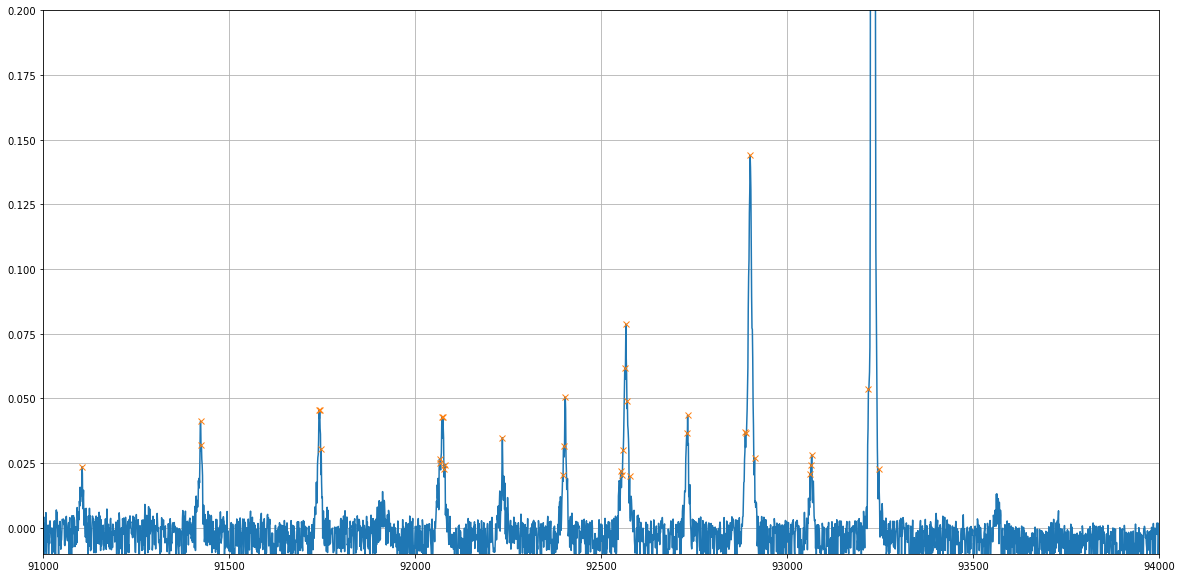

In [11]:
plt.figure(figsize=(20,10))
peaks, f = find_peaks(x, height=0.02)
plt.plot(df2.Column1, x)
plt.plot(peaks+df2.Column1.min(), x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.xlim(91000,94000)
plt.ylim(-0.01,0.2)
plt.grid(True)

In [12]:
peaks+df2.Column1.min(),f
pd.DataFrame(f, index=peaks+df2.Column1.min())

,peak_heights
91105,0.023645
91424,0.041229
91426,0.032051
91742,0.045483
91744,0.045383
91748,0.030477
92066,0.026659
92068,0.025018
92073,0.042870
92075,0.042937


In [13]:
i  = pd.read_csv('ipk.txt', delimiter='\t')
i

,Column1,v
0,91105,0.023645
1,91424,0.041229
2,91742,0.045483
3,92075,0.042937
4,92235,0.034797
5,92404,0.050542
6,92567,0.078759
7,92733,0.043507
8,92901,0.143919
9,93067,0.028199


In [14]:
make_into_wavelength(i,1.2622,-98835)

0     618.898780
1     603.851140
2     589.561725
3     575.305638
4     568.698267
5     561.882073
6     555.460899
7     549.070647
8     542.751381
9     536.648608
10    530.717099
Name: Column1, dtype: float64

(-0.01, 2.5)

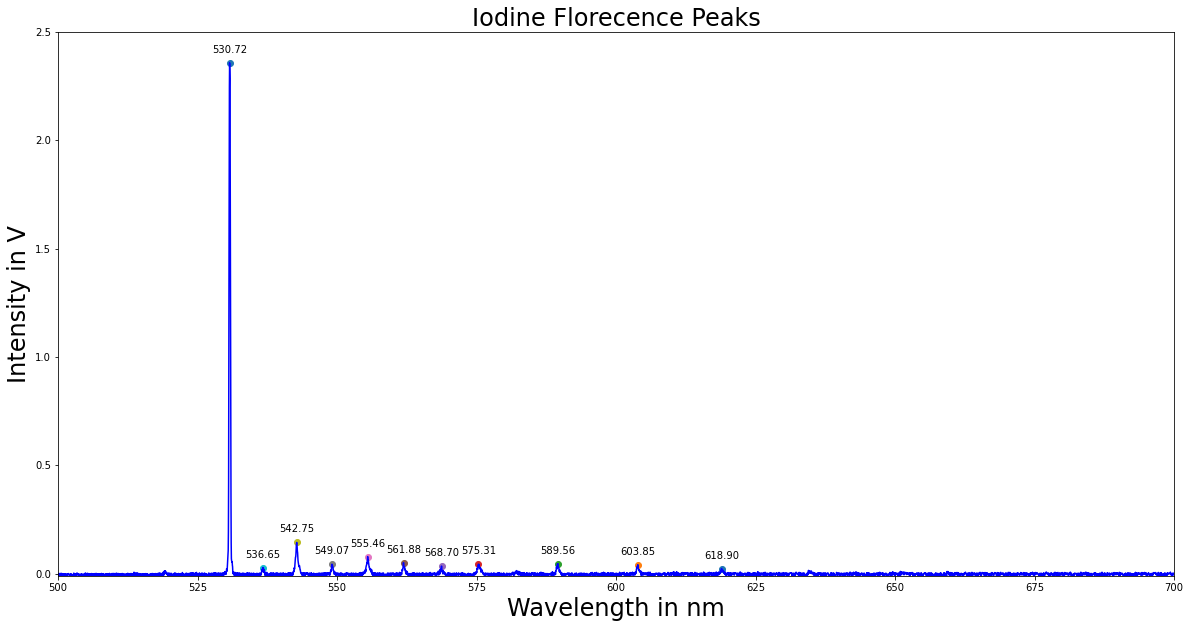

In [22]:
plt.figure(figsize=(20,10))
plt.title("Iodine Florecence Peaks", fontsize=24)
plt.plot(make_into_wavelength(df2,1.2622,-98835),-df2.Average-(-df2.Average).mean(), color='b')
for index, z in enumerate(make_into_wavelength(i,1.2622,-98835)):
#     print(index, z)
    label="{0:.2f}".format(z)
    plt.scatter(z, i.v[index], marker='o')
    plt.annotate(label, # this is the text
                 (z, i.v[index]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
# plt.scatter(make_into_wavelength(i,1.2622,-98835),i.v, color='r')
plt.ylabel("Intensity in V",fontsize=24)
plt.xlabel("Wavelength in nm",fontsize=24)
plt.xlim(500,700)
plt.ylim(-0.01,2.5)

# plt.legend(prop={'size': 30})

(-0.01, 0.2)

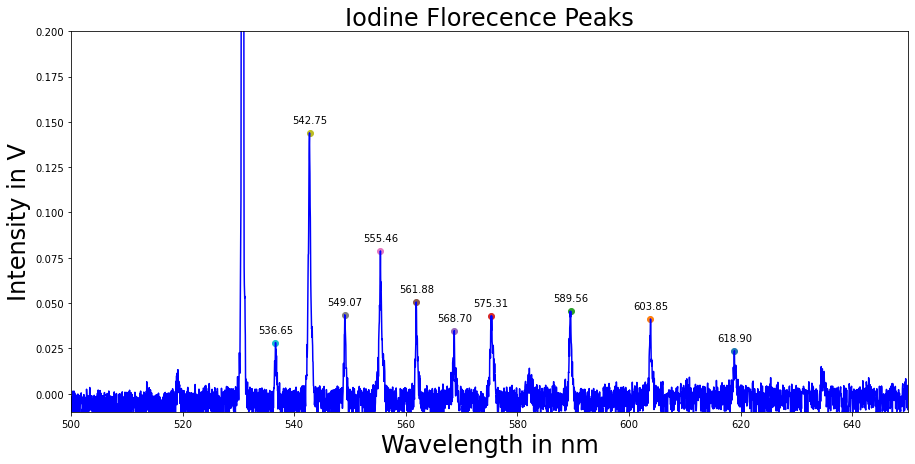

In [57]:
plt.figure(figsize=(15,7))
plt.title("Iodine Florecence Peaks", fontsize=24)
plt.plot(make_into_wavelength(df2,1.2622,-98835),-df2.Average-(-df2.Average).mean(), color='b')
for index, z in enumerate(make_into_wavelength(i,1.2622,-98835)):
    label="{0:.2f}".format(z)
    plt.scatter(z, i.v[index], marker='o')
    if index == 10:
        pass
    else:
        plt.annotate(label, # this is the text
                         (z, i.v[index]), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center')
# plt.scatter(make_into_wavelength(i,1.2622,-98835),i.v, color='r')
plt.ylabel("Intensity in V",fontsize=24)
plt.xlabel("Wavelength in nm",fontsize=24)
plt.xlim(500,650)
plt.ylim(-0.01,0.20)

# plt.legend(prop={'size': 30})